In [1]:
import numpy as np
import pandas as pd

### Create a sampler

In [2]:
import random

from scar import ALPHA, C, MEAN_P, COV_P, MEAN_N, COV_N

random.seed(0)


def get_samples(n: int):
    x, y, s = [], [], []
    for _ in range(n):
        if random.random() < ALPHA:
            x.append(np.random.multivariate_normal(MEAN_P, COV_P, 1))
            y.append(1)
            if random.random() < C:
                s.append(1)
            else:
                s.append(0)
        else:
            x.append(np.random.multivariate_normal(MEAN_N, COV_N, 1))
            y.append(0)
            s.append(0)

    return np.concatenate(x), np.asarray(y), np.asarray(s)

### Create a dataset

In [3]:
from scar import N_TRAIN, N_VALID, N_TEST

train = get_samples(N_TRAIN)
valid = get_samples(N_VALID)
test = get_samples(N_TEST)

### Visualize created data

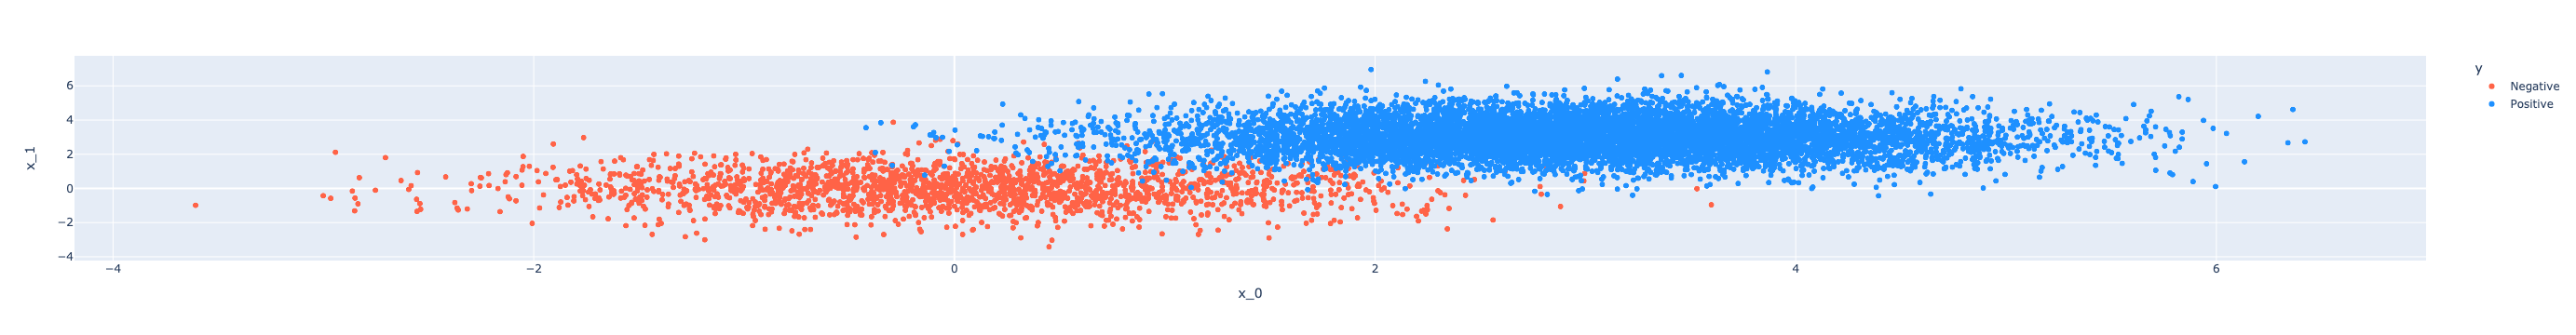

In [4]:
from utils import plot_x_y

x, y, s = train

plot_x_y(x, y)

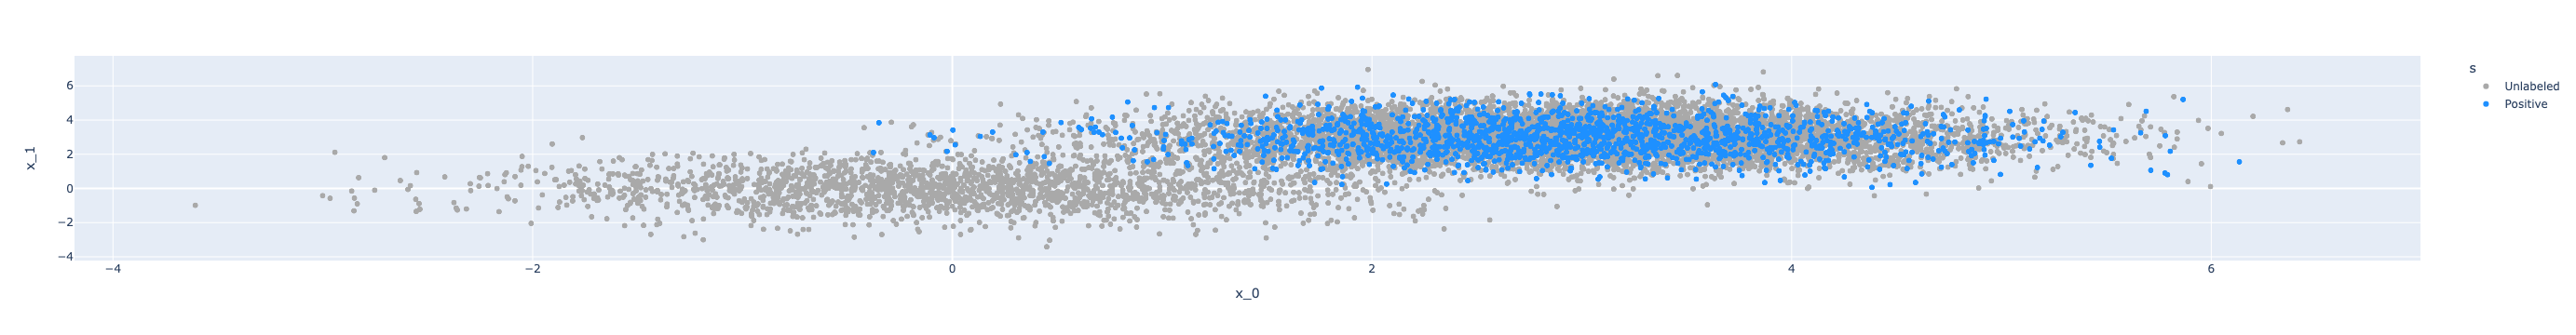

In [5]:
from utils import plot_x_s

plot_x_s(x, s)

In [6]:
with open("scar/train.csv", "wt") as f:
    x, y, s = train
    f.write("x_0,x_1,y,s\n")
    for i in range(len(x)):
        f.write(f"{x[i][0]},{x[i][1]},{y[i]},{s[i]}\n")

with open("scar/valid.csv", "wt") as f:
    x, y, s = valid
    f.write("x_0,x_1,y,s\n")
    for i in range(len(x)):
        f.write(f"{x[i][0]},{x[i][1]},{y[i]},{s[i]}\n")

with open("scar/test.csv", "wt") as f:
    x, y, s = test
    f.write("x_0,x_1,y,s\n")
    for i in range(len(x)):
        f.write(f"{x[i][0]},{x[i][1]},{y[i]},{s[i]}\n")